In [12]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]

S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

print(np.shape(X))

(2000, 3)


In [13]:
import numpy as np
from sklearn.decomposition import PCA, FastICA

time_start = 0
time_end = 10
time_steps = 0.01
time = np.arange(time_start, time_end, time_steps)

eta = np.random.normal(size=np.shape(time))
f1 = np.sin(time) + 0.001 * eta
eta = np.random.normal(size=np.shape(time))
f2 = 2 * (time - np.floor(time)) + 0.002 * eta
eta = np.random.normal(size=np.shape(time))
f3 = 0.01 * time + 0.001 * eta

f = np.array([f1, f2, f3])
A = np.random.rand(3, 3)
x = np.matmul(A, f)

ica = FastICA(whiten="unit-variance")
_ = ica.fit(x.T)
x_ICA = ica.fit_transform(x.T)
x_ICA_inv = ica.inverse_transform(x.T)

pca = PCA()  
_ = pca.fit(x.T)
x_PCA = pca.fit_transform(x.T)
x_PCA_inv = pca.inverse_transform(x.T)

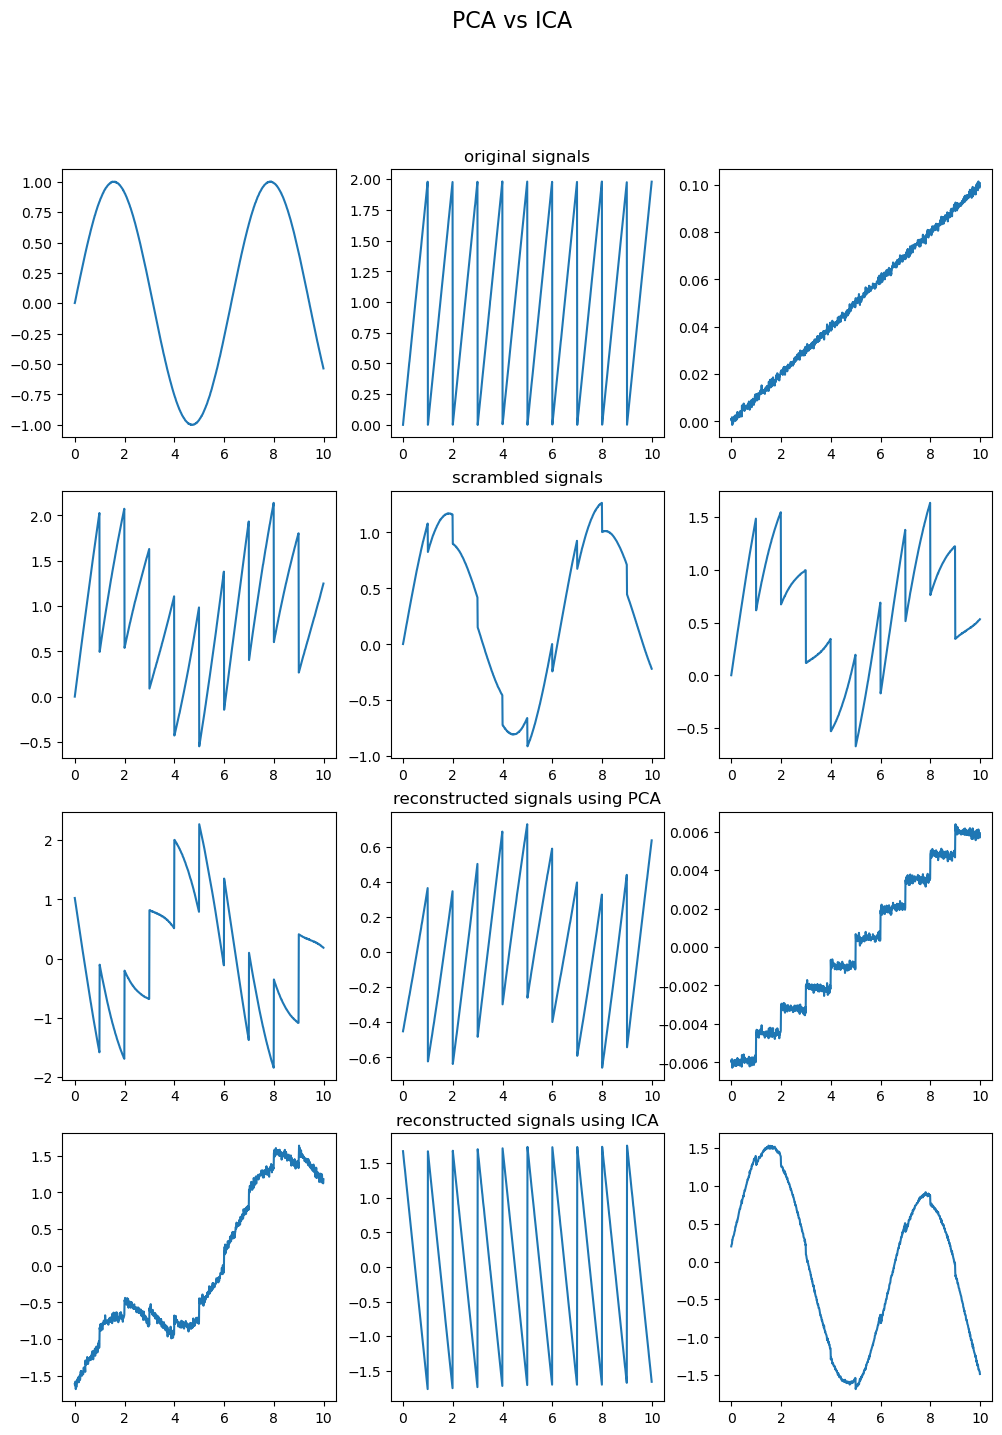

In [14]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 16))
figure.suptitle("PCA vs ICA", fontsize=16)
ax1 = figure.add_subplot(4, 3, 1)
ax1.plot(time, f[0])
ax2 = figure.add_subplot(4, 3, 2)
ax2.plot(time, f[1])
ax2.title.set_text("original signals")
ax3 = figure.add_subplot(4, 3, 3)
ax3.plot(time, f[2])
ax4 = figure.add_subplot(4, 3, 4)
ax4.plot(time, x[0])
ax5 = figure.add_subplot(4, 3, 5)
ax5.plot(time, x[1])
ax5.title.set_text("scrambled signals")
ax6 = figure.add_subplot(4, 3, 6)
ax6.plot(time, x[2])
ax7 = figure.add_subplot(4, 3, 7)
ax7.plot(time, x_PCA[:, 0])
ax8 = figure.add_subplot(4, 3, 8)
ax8.plot(time, x_PCA[:, 1])
ax8.title.set_text("reconstructed signals using PCA")
ax9 = figure.add_subplot(4, 3, 9)
ax9.plot(time, x_PCA[:, 2])
ax10 = figure.add_subplot(4, 3, 10)
ax10.plot(time, x_ICA[:, 0])
ax11 = figure.add_subplot(4, 3, 11)
ax11.plot(time, x_ICA[:, 1])
ax11.title.set_text("reconstructed signals using ICA")
ax12 = figure.add_subplot(4, 3, 12)
ax12.plot(time, x_ICA[:, 2])

While PCA is able to reconstruct the linear (3rd) signal, it is not able to reconstruct the first two signals.

ICa, however, is able to reconstruct the first two signals, but fails to reconstruct the third signal.

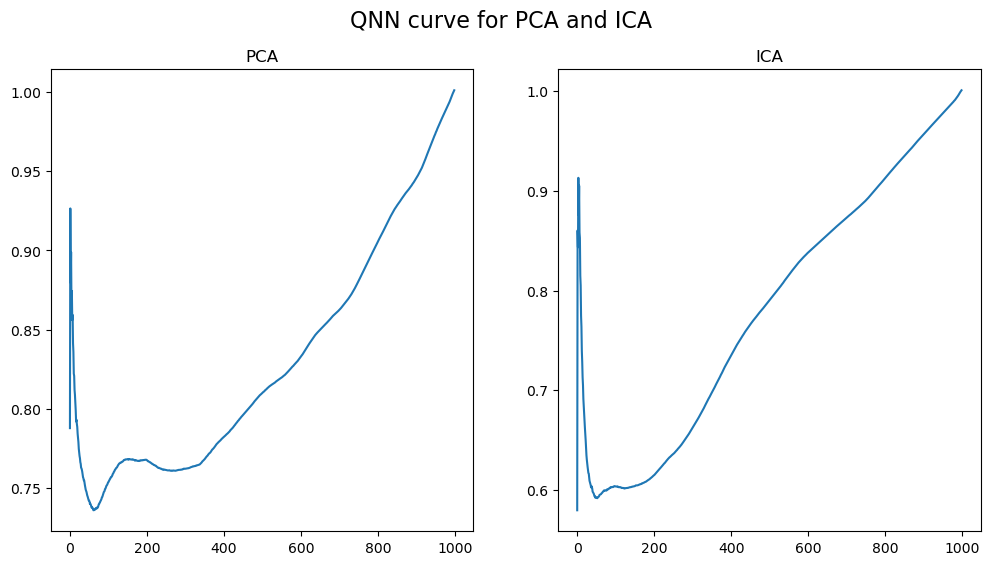

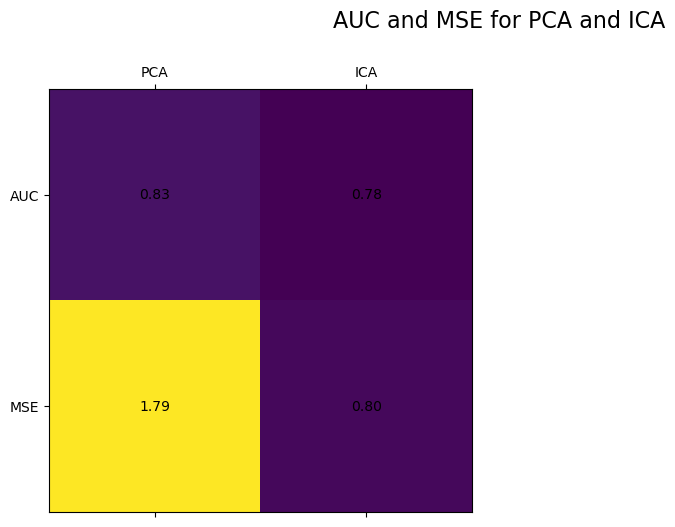

In [21]:
from pyDRMetrics.pyDRMetrics import DRMetrics

metrics_pca = DRMetrics(f.T, x_PCA, x_PCA_inv)
metrics_ica = DRMetrics(f.T, x_ICA, x_ICA_inv)

# Plot QNN curve for PCA and ICA
figure = plt.figure(figsize=(12, 6))
figure.suptitle("QNN curve for PCA and ICA", fontsize=16)
ax1 = figure.add_subplot(1, 2, 1)
ax1.plot(metrics_pca.QNN)
ax1.title.set_text("PCA")
ax2 = figure.add_subplot(1, 2, 2)
ax2.plot(metrics_ica.QNN)
ax2.title.set_text("ICA")

auc_pca = metrics_pca.AUC
auc_ica = metrics_ica.AUC
mse_pca = metrics_pca.mse
mse_ica = metrics_ica.mse

# Plot AUC and MSE with matshow
figure = plt.figure(figsize=(12, 6))
figure.suptitle("AUC and MSE for PCA and ICA", fontsize=16)
ax1 = figure.add_subplot(1, 2, 1)
ax1.matshow(np.array([[auc_pca, auc_ica], [mse_pca, mse_ica]]))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["PCA", "ICA"])
ax1.set_yticks([0, 1])
ax1.set_yticklabels(["AUC", "MSE"])
for (i, j), z in np.ndenumerate(np.array([[auc_pca, auc_ica], [mse_pca, mse_ica]])):
    ax1.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
